In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/spam_ham_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
for col in df.columns:
    print(col)

Unnamed: 0
label
text
label_num


In [ ]:
df.drop(['Unnamed: 0','label'], axis = 1)

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


# EMAIL TEXT CLASSIFICATION

**PART 1**: EDA & TEXT NORMALIZATION

**Overview**
The objective of this project is to classify emails as spam or not.We would be carrying out following steps in the notebook.


*   Perform basic exploratory analysis comparing the distributions of the number of characters,number of words and average word length of the mail.
*  Used text normalization techniques such as *convertion to lowercase*,*removal of whitespaces*,*removal of punctuations*,*removal* *of unicode characters*,*substitution of acronyms, substitution of contractions, removal of stop words, stemming and lemmatization, discardment of non-alphabetic words, retainment of relevant parts of speech, removal of additional stop words*
*   Combined the process in such a order that, it takes text as an input and gives out normalized text as the output.
*   Implemented text normalization onto the dataset.

*1.Importing Libraries*

In [ ]:
#File System Management
import time,psutil,os
#Data Manipulation
import numpy as np
import pandas as pd
#Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#NLP
import string,re,nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# Others
import json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2. *Runtime & Memory Usage*

In [ ]:
#Recording the starting time, complemented with a stopping check at the end of compute process runtime
start = time.time()
#Class representing the OS process and having memory_info() method to compute memeory usage
process = psutil.Process(os.getpid())

In [ ]:
df['text'].iloc[3]

'Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n'

In [ ]:
df['text'].iloc[5]

'Subject: ehronline web address change\r\nthis message is intended for ehronline users only .\r\ndue to a recent change to ehronline , the url ( aka " web address " ) for accessing ehronline needs to be changed on your computer . the change involves adding the letter " s " to the " http " reference in the url . the url for accessing ehronline should be : https : / / ehronline . enron . com .\r\nthis change should be made by those who have added the url as a favorite on the browser .'

In [ ]:
#Missing value and duplicate values
print(pd.Series({"Number of observations with missing values": len(df) - len(df.dropna()),
                 "Number of duplicate observations": df.duplicated().sum()}).to_string())

Number of observations with missing values    0
Number of duplicate observations              0


In [ ]:
#Splitting the dataset by label
data_h = df[df['text'] == 0] #ham email
data_s = df[df['text'] == 1] #spam email

3*.Class Frequencies*

In [ ]:
# Visualization of class frequencies
values = np.array([len(data_h), len(data_s)])
labels = ['Ham Mails', 'Spam Mails']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 200, width = 500, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

4.*Number of Characters*

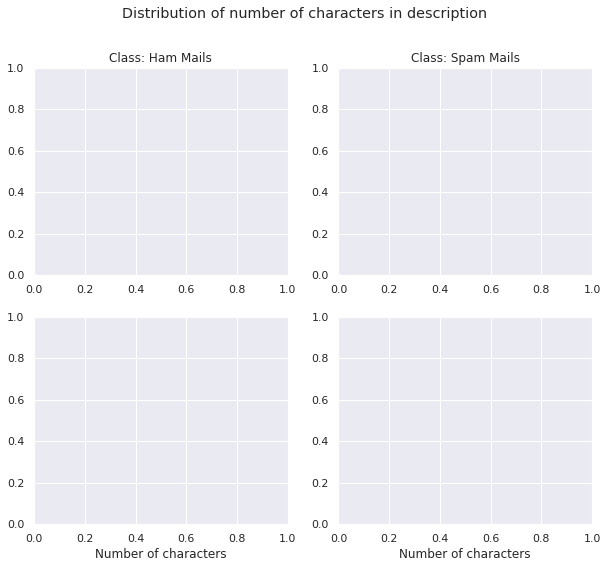

In [ ]:
# Distribution of number of characters in description
data_h_char = data_h['text'].str.len()
data_s_char = data_s['text'].str.len()

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_h_char, bins = 2, ax = ax[0, 0]).set_title('Class: Ham Mails')
sns.histplot(x = data_s_char, bins = 2, ax = ax[0, 1]).set_title('Class: Spam Mails')


fig.suptitle("Distribution of number of characters in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of characters")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")


# **TEXT NORMALIZATION**

*   **Convertion to lowercase**

In [ ]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

In [ ]:
def convert_to_lowercase(text):
    return text.lower()

*   **Removal of Whitespaces**

In [ ]:
def remove_whitespace(text):
    return text.strip()

* **Removal of Punctuations **

In [ ]:
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

* **Removal** **of** **Unicode** **Characters**

In [ ]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [ ]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

*   **Substitution of Acronyms**

In [ ]:
# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/tapish1822/Spam-Classifier/main/acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')


In [ ]:
# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [ ]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [ ]:
# Function to convert acronyms in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

* **Substitution** **of** **Contractions**

In [ ]:
# Dictionary of contractions
contractions_url = 'https://raw.githubusercontent.com/tapish1822/Spam-Classifier/main/contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

In [ ]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


In [ ]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [ ]:
# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

* **Removal** **of** **Stop** **Words**

In [ ]:
# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["Subject","among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

*   **Spelling** **Checker**

In [ ]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected


**Lemmatization**

In [ ]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy

**Discardment** **of** **Non**-**alphabetic** **Words**

In [ ]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

**Retainment of Relevant Parts of Speech**

In [ ]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

**Removal of Additional Stop Words**

In [ ]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

**Integration of the Processes**

In [ ]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
#     text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text


**Implementation on Mail Description**

In [ ]:
%%time
# Implementing text normalization
data_normalized = pd.DataFrame()
data_normalized['normalized description'] = df['text'].apply(text_normalizer)
data_normalized['label_num'] = df['label_num']
data_normalized

CPU times: user 1min 54s, sys: 666 ms, total: 1min 55s
Wall time: 2min 2s


,normalized description,label_num
0,enron methanol meter follow note give monday f...,0
1,hpl nom see attach file hplnol xls hplnol xls,0
2,neon retreat ho ho ho time year neon leader re...,0
3,photoshop window office cheap trend abasement ...,1
4,spring deal book teco pvr revenue understand s...,0
...,...,...
5166,put transport volume decrease contract forward...,0
5167,nom hpl take mmcf weekend try week stay mmcf r...,0
5168,gas nomination julie mention early start unit ...,0
5169,worksheet activity attach worksheet august act...,0


In [ ]:
# Saving the dataframe
data_normalized.to_csv('spamDataset_normalized.csv', index = False)